In [1]:
!git clone https://github.com/MaxSoloAT/cardio_pd.git 

Cloning into 'cardio_pd'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [2]:
# Імпорт бібліотек.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('./cardio_pd/cardio_train.csv', sep=';') # Завантаження інформації з csv.

In [4]:
df.head(10).T # Візуалізація інформації у вигляді таблиці.

,0,1,2,3,4,5,6,7,8,9
id,0.0,1.0,2.0,3.0,4.0,8.0,9.0,12.0,13.0,14.0
age,18393.0,20228.0,18857.0,17623.0,17474.0,21914.0,22113.0,22584.0,17668.0,19834.0
gender,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
height,168.0,156.0,165.0,169.0,156.0,151.0,157.0,178.0,158.0,164.0
weight,62.0,85.0,64.0,82.0,56.0,67.0,93.0,95.0,71.0,68.0
ap_hi,110.0,140.0,130.0,150.0,100.0,120.0,130.0,130.0,110.0,110.0
ap_lo,80.0,90.0,70.0,100.0,60.0,80.0,80.0,90.0,70.0,60.0
cholesterol,1.0,3.0,3.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0
gluc,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
smoke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.describe().T # Статистика по кожному числовому признаку.

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [6]:
df['cardio'].value_counts() # Кількість здорових та хворих.

0    35021
1    34979
Name: cardio, dtype: int64

In [7]:
df['cardio'].value_counts(normalize=True) # Те саме що і зверху але у %.

0    0.5003
1    0.4997
Name: cardio, dtype: float64

**Візуалізація** "*ФІЧ*"

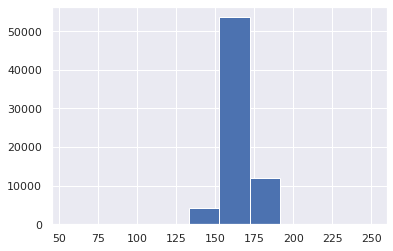

In [8]:
df['height'].hist(); # Розподіл значень зросту пацієнтів. Теорія стверджує, що зростання - величина, зазвичай має нормальний розподіл.

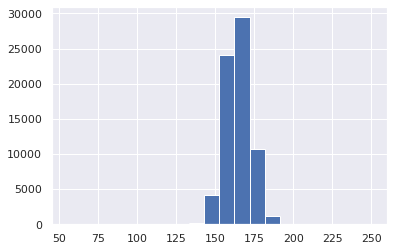

In [9]:
df['height'].hist(bins=20); # Покращена статистика 

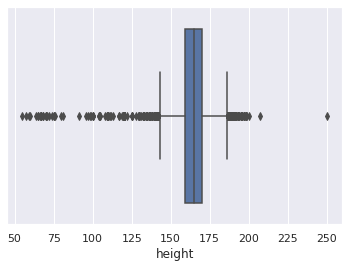

In [10]:
sns.boxplot(df['height']);
# Ширина "ящика" дорівнює інтерквантільному розмаху (різниця між третім Q3 і першим Q1 квартилями).
# Вертикальна лінія всередині ящика показує медіану (другий квартиль).
# "Вусики" обмежують точки, що потрапляють в інтервал [Q1-1.5 * IQR; Q3 + 1.5 * IQR], де IQR - інтерквартільний розмах.
# Нарешті, окремі точки на графіку відповідають викидам - нетиповим для даної вибірки значень. Як бачимо, їх виявилося досить багато.

In [0]:
df['age'] = (df['age'] / 365).round()

In [12]:
df.groupby('cardio')['age'].mean()

cardio
0    51.731218
1    54.948083
Name: age, dtype: float64

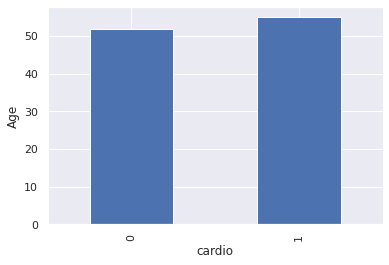

In [13]:
df.groupby('cardio')['age'].mean().plot(kind='bar') 
plt.ylabel('Age')
plt.show();

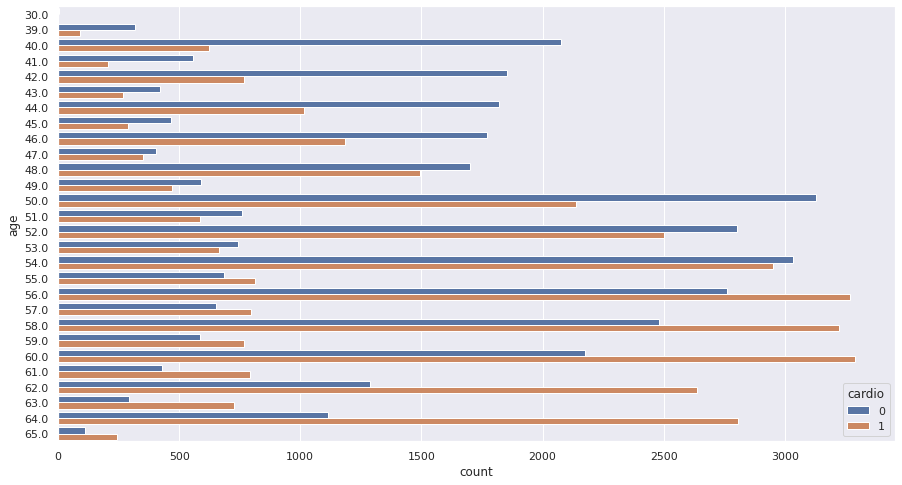

In [14]:
plt.figure(figsize=(15, 8)) 
sns.countplot(y='age', hue='cardio', data=df);
# Кількість здорових і хворих пацієнтів за віковими групами.

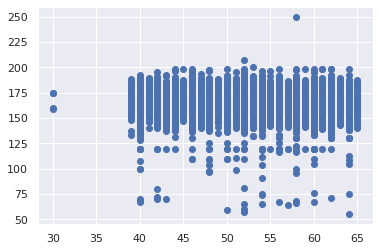

In [15]:
plt.scatter(df['age'], df['height']);
# Окремі значення в даних - це просто помилки введення.

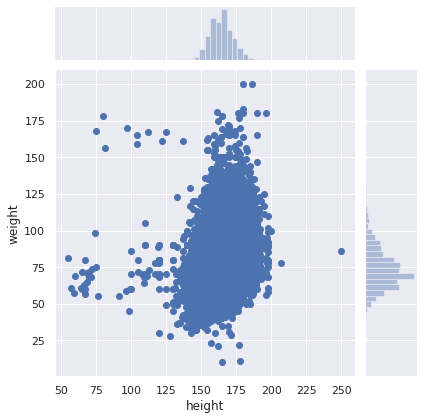

In [16]:
sns.jointplot(x='height', y='weight', data=df);
# Помилки і аномалії в даних чітко видно і на цьому графіку. 
# Також можна зробити висновок, що без урахування похибок зріст і вага мають розподіл, близький до нормального.